In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
files = glob.glob("sautidb_hausa_released_26032022/*.wav", recursive=True)

In [3]:
fname = [f.split("/")[-1] for f in files]

In [4]:
DATA_DIR = "../data"
with open(f"{DATA_DIR}/cmuarctic.json", "r") as f:
    sentences = json.load(f)

In [5]:
df = pd.DataFrame(fname, columns=["filename"])
df["nativeLanguage"] = df["filename"].apply(lambda x: x.split("_")[0])
df["fluentLanguage"] = df["filename"].apply(lambda x: x.split("_")[1])
df["speakerID"] = df["filename"].apply(lambda x: x.split("_")[2])
df["gender"] = df["filename"].apply(lambda x: x.split("_")[3])
df["sentenceID"] = df["filename"].apply(lambda x: x.split("_")[-1].split(".")[0])
df["sentence"] = df["sentenceID"].apply(lambda x: sentences[x.capitalize()])
df.head()

,filename,nativeLanguage,fluentLanguage,speakerID,gender,sentenceID,sentence
0,HAUSA_HAUSA_1255_M_B0150.wav,HAUSA,HAUSA,1255,M,B0150,And he was filled with a strange and forebodin...
1,HAUSA_HAUSA_1259_M_B0208.wav,HAUSA,HAUSA,1259,M,B0208,You read the quotations in today's paper.
2,HAUSA_HAUSA_1249_M_A0051.wav,HAUSA,HAUSA,1249,M,A0051,"The lace was of a delicate ivory color, faintl..."
3,HAUSA_HAUSA_1253_M_B0244.wav,HAUSA,HAUSA,1253,M,B0244,"You are positively soulless, he said savagely."
4,HAUSA_HAUSA_1253_M_A0146.wav,HAUSA,HAUSA,1253,M,A0146,"Of course, that is uninteresting, she continued."


### Compute audio duration

In [6]:
import librosa

In [7]:
AUDIO_DIR="sautidb_hausa_released_26032022"
duration = lambda x: librosa.get_duration(filename=f"{AUDIO_DIR}/{x}")
df["duration"] = df["filename"].apply(lambda x: f"{duration(x):.2f}")
print(len(df))
df.head()

218


,filename,nativeLanguage,fluentLanguage,speakerID,gender,sentenceID,sentence,duration
0,HAUSA_HAUSA_1255_M_B0150.wav,HAUSA,HAUSA,1255,M,B0150,And he was filled with a strange and forebodin...,3.18
1,HAUSA_HAUSA_1259_M_B0208.wav,HAUSA,HAUSA,1259,M,B0208,You read the quotations in today's paper.,5.59
2,HAUSA_HAUSA_1249_M_A0051.wav,HAUSA,HAUSA,1249,M,A0051,"The lace was of a delicate ivory color, faintl...",5.42
3,HAUSA_HAUSA_1253_M_B0244.wav,HAUSA,HAUSA,1253,M,B0244,"You are positively soulless, he said savagely.",3.44
4,HAUSA_HAUSA_1253_M_A0146.wav,HAUSA,HAUSA,1253,M,A0146,"Of course, that is uninteresting, she continued.",3.08


In [8]:
df.to_csv("audio_hausa_metadata.csv", index=None)

### Combine metadata

In [9]:
old_version_meta = pd.read_csv(f"{DATA_DIR}/sautidb_v1.1/audio_metadata.csv")
len(old_version_meta)

919

In [10]:
new_version_meta = pd.concat([old_version_meta, df])
new_version_meta.head()

,filename,nativeLanguage,fluentLanguage,speakerID,gender,sentenceID,sentence,duration
0,YORUBA_YORUBA_0230_M_A0194.wav,YORUBA,YORUBA,230,M,A0194,He drank of the water cautiously.,1.73
1,YORUBA_YORUBA_0006_M_B0354.wav,YORUBA,YORUBA,6,M,B0354,It's that much junk.,1.67
2,YORUBA_YORUBA_0006_M_B0383.wav,YORUBA,YORUBA,6,M,B0383,A bush chief had died a natural death.,2.96
3,YORUBA_YORUBA_0048_M_B0151.wav,YORUBA,YORUBA,48,M,B0151,"It was steel, a fisher trap.",3.13
4,EDO_OTHERS_0175_F_A0186.wav,EDO,OTHERS,175,F,A0186,Like a flash he launched himself into the feat...,4.27


In [11]:
len(new_version_meta)

1137

In [12]:
new_version_meta.to_csv("audio_metadata.csv", index=None)
new_version_meta.to_csv(f"{DATA_DIR}/sautidb_v1.2/audio_metadata.csv", index=None)

## Analysis

Text(0.5, 1.0, 'Sentence ID distribution')

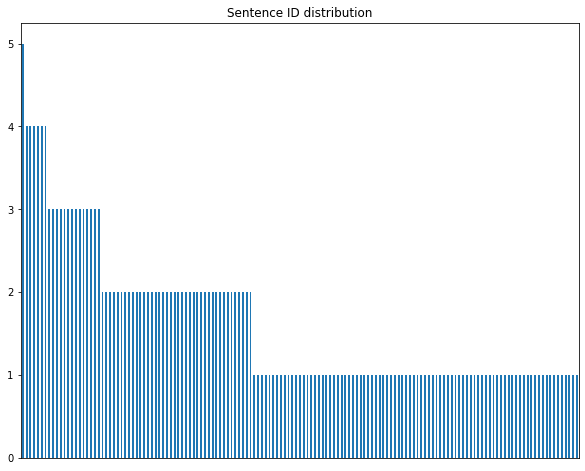

In [16]:
new_version_meta.sentence.value_counts().plot(kind='bar', figsize=(10, 8), xticks=[])
plt.title("Sentence ID distribution")

Text(0.5, 1.0, 'Unique speaker ids')

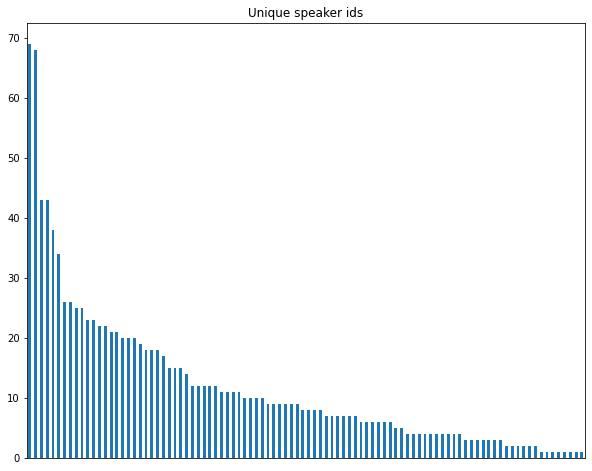

In [17]:
new_version_meta.speakerID.value_counts().plot(kind='bar', figsize=(10, 8), xticks=[])
plt.title("Unique speaker ids")

Text(0.5, 1.0, 'Gender distribution')

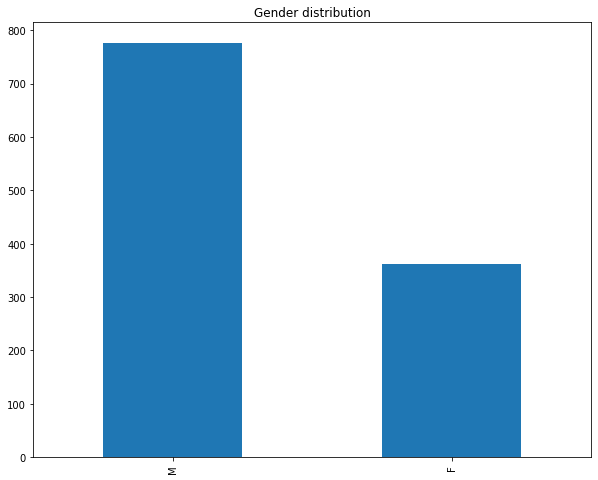

In [18]:
new_version_meta.gender.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Gender distribution")

Text(0.5, 1.0, 'Native Language distribution')

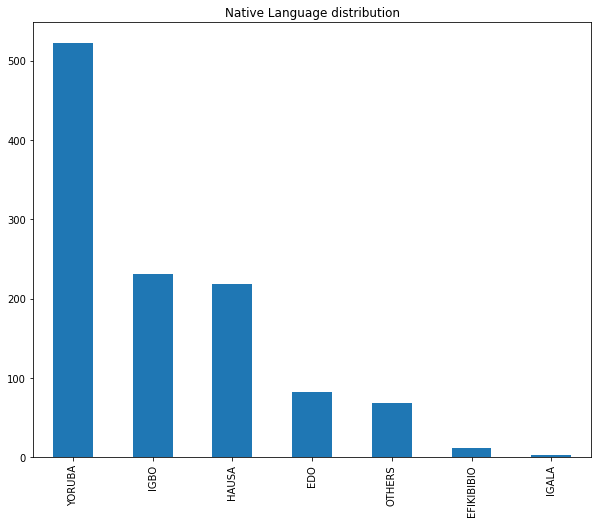

In [19]:
new_version_meta.nativeLanguage.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Native Language distribution")

Text(0.5, 1.0, 'Fluent Language distribution')

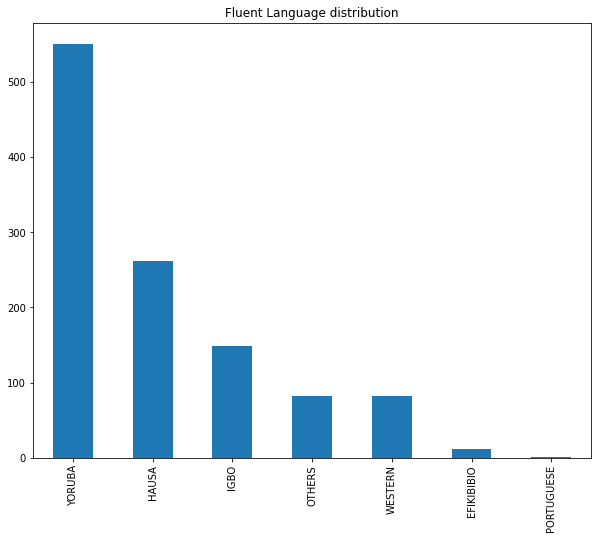

In [20]:
new_version_meta.fluentLanguage.value_counts().plot(kind='bar', figsize=(10, 8))
plt.title("Fluent Language distribution")